# TODO
Produce figures from different trainings:
* Reconstruction: x1,x2, and x1,x2_hat
* Latent space training evolution
* Evolution of group representation

In [53]:
import os
os.chdir('/home/hamza/projects/displacementae')
import __init__
from experiments import train_utils as tu
import torch
from utils import save
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import json
from utils import test

In [2]:
save_dir = '/home/hamza/projects/displacementae/saved/armeye/adap_vae'

In [4]:
class Config:
    def __init__(self):
        pass
def load_config(id):
    config = Config()
    with open(os.path.join(save_dir,str(id),'config.json'),'r') as f:
        config.__dict__ = json.load(f)
    return config


In [38]:
id = 0
config = load_config(0)
dataset, dataloader = tu.setup_data(config)


In [15]:
exp_dir = os.path.join(save_dir,str(id))
epochs = [int(a.split('_')[1][:-2]) for a in os.listdir(exp_dir) if a[:4] == "dist"]

In [17]:

f = f'rot_repr_{0}'
save.load_object(exp_dir,f)

Parameter containing:
tensor([0.1000], device='cuda:0', dtype=torch.float64, requires_grad=True)

In [30]:
def get_repr(save_dir=save_dir,id=id,grp=0):
    """
    grp either 0 or 1, correspond to rotational 0 or translational 1
    """
    if grp==0:
        filename = "rot_repr_"
    if grp==1:
        filename = "trans_repr_"
    exp_dir = os.path.join(save_dir,str(id))
    epochs = [int(a.split('_')[1][:-2]) for a in os.listdir(exp_dir) if a[:4] == "dist"]
    ret = []
    dir_files = os.listdir(exp_dir)
    for e in epochs:
        ret.append(save.load_object(exp_dir,filename+str(e)))
    return epochs,torch.cat(ret)


In [32]:
epochs, repr = get_repr()

In [39]:
dataset.joint_steps

tensor([0.2094, 0.2094, 0.2094], dtype=torch.float64)

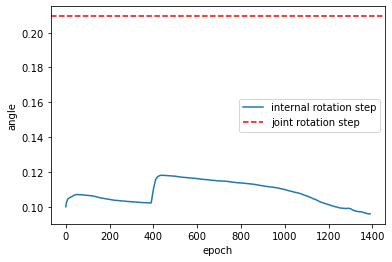

In [48]:
fig = plt.figure()
plt.plot(epochs,repr.cpu().data.numpy(),label='internal rotation step')
plt.axhline(dataset.joint_steps[0],color='r',linestyle='--',label='joint rotation step')
plt.ylabel('angle')
plt.xlabel('epoch')
plt.legend()
figname = 'repr_evolution.jpg'
fig.savefig(os.path.join(exp_dir,figname))

In [55]:
@interact
def load_n_plot(i=(0,1,1),j=(0,200,1)):
    j_list = [2*k for k in range(5)] + [10*k for k in range(200)]
    z,angles = test.load_distribs(save_dir,config.id,j_list[j])
    plt.scatter(z[:,2*i],z[:,2*i+1],c=angles[:,i+1])
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    clb = plt.colorbar()
    clb.ax.set_title('cos( joint angle )')
    plt.title(f'Learned latent, epoch {j}')

interactive(children=(IntSlider(value=0, description='i', max=1), IntSlider(value=100, description='j', max=20…

In [74]:
batch = next(iter(dataloader))

In [83]:
@interact
def plot(i=(0,29,1)):
    fig,axis = plt.subplots(1,2,figsize=(5,10))
    axis[0].imshow(np.moveaxis(batch[0][i].numpy(),0,-1))
    axis[1].imshow(np.moveaxis(batch[2][i].numpy(),0,-1))

interactive(children=(IntSlider(value=14, description='i', max=29), Output()), _dom_classes=('widget-interact'…

In [85]:
@interact
def plot(i=(0,29,1),j=(0,29,1),k=(0,29,1)):
    idx = dataset.get_index([i,j,k])
    plt.imshow(np.moveaxis(dataset[idx][0],0,-1))

interactive(children=(IntSlider(value=14, description='i', max=29), IntSlider(value=14, description='j', max=2…

In [73]:
config.__dict__['shuffle'] = False
dataset, dataloader = tu.setup_data(config)


In [81]:
dataloader.sampler.get_index(3)

2714